In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical  # Replacing np_utils
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [30]:

path = r'/Users/andrenedvidek/Desktop/Data Analaysis/CareerFoundry /Specialization/Task 2.5/Data/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [42]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [43]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [52]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 35, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step - accuracy: 0.7725 - loss: 0.0793 - val_accuracy: 0.7917 - val_loss: 0.0786
Epoch 2/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.7500 - loss: 0.0727 - val_accuracy: 0.5000 - val_loss: 0.1404
Epoch 3/35


/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 234ms/step - accuracy: 0.7298 - loss: 0.0877 - val_accuracy: 0.8102 - val_loss: 0.0842
Epoch 4/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.8333 - loss: 0.0657 - val_accuracy: 0.8750 - val_loss: 0.0624
Epoch 5/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 230ms/step - accuracy: 0.7884 - loss: 0.0790 - val_accuracy: 0.7870 - val_loss: 0.0806
Epoch 6/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.7500 - loss: 0.0765 - val_accuracy: 0.7500 - val_loss: 0.1219
Epoch 7/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 244ms/step - accuracy: 0.7525 - loss: 0.0864 - val_accuracy: 0.7917 - val_loss: 0.0791
Epoch 8/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.6667 - loss: 0.1182 - val_accuracy: 0.8750 - val_loss: 0.0590
Epoch 9/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 245ms/step - accuracy: 0.8088 - loss: 0.0687 - val_accuracy: 0.8194 - val_loss: 0.0755
Epoch 10/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.6667 - loss: 0.0690 - val_accuracy: 1.0000 -

2024-09-28 13:31:41.810602: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 243ms/step - accuracy: 0.8606 - loss: 0.0535 - val_accuracy: 0.8102 - val_loss: 0.0756
Epoch 14/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8333 - loss: 0.0332 - val_accuracy: 0.6250 - val_loss: 0.1501
Epoch 15/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 243ms/step - accuracy: 0.9043 - loss: 0.0373 - val_accuracy: 0.8287 - val_loss: 0.0713
Epoch 16/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9167 - loss: 0.0370 - val_accuracy: 0.7500 - val_loss: 0.0824
Epoch 17/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 241ms/step - accuracy: 0.8687 - loss: 0.0459 - val_accuracy: 0.7454 - val_loss: 0.0960
Epoch 18/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 1.0000 - loss: 0.0160 - val_accuracy: 0.7500 - val_loss: 0.0880
Epoch 19/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 243ms/step - accuracy: 0.8792 - loss: 0.0397 - val_accuracy: 0.8241 - val_loss: 0.0733
Epoch 20/35
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.9167 - loss: 0.0327 - val_accuracy: 1.

In [53]:
results = pd.DataFrame(model.history.history)

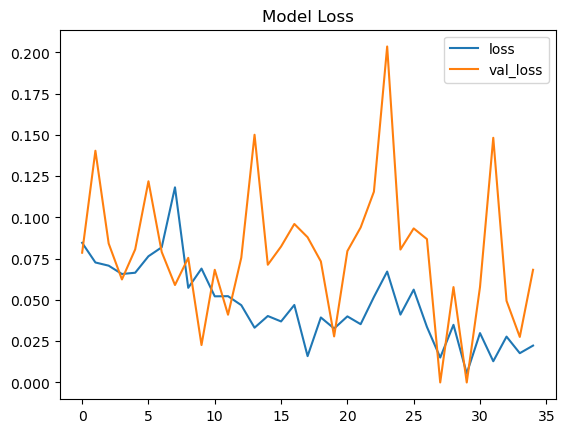

In [54]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

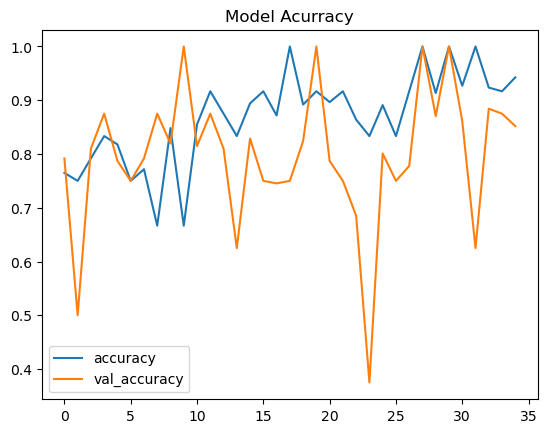

In [55]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [56]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9426321983337402, Val_Accuracy: 0.8518518805503845
Loss: 0.022351181134581566, Val_Loss: 0.06826495379209518


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step


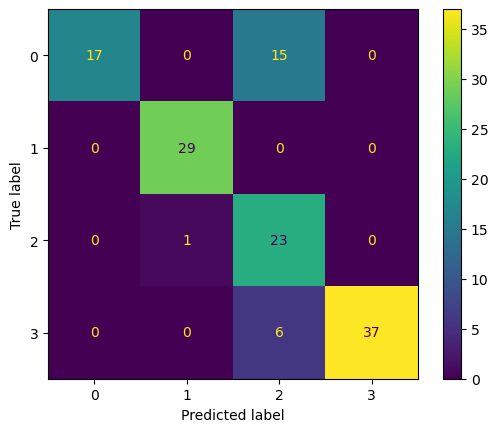

In [57]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [58]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


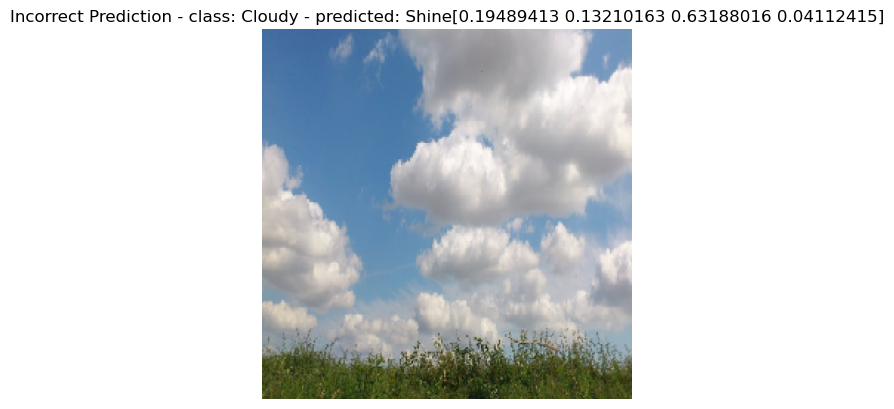

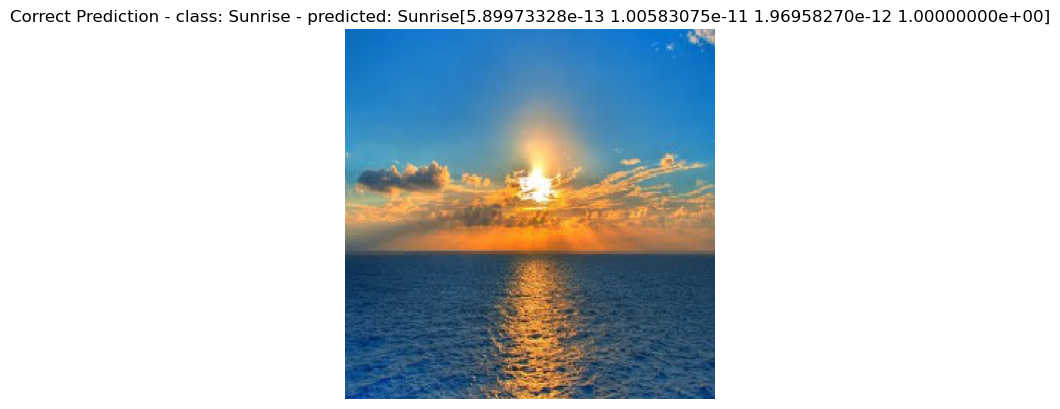

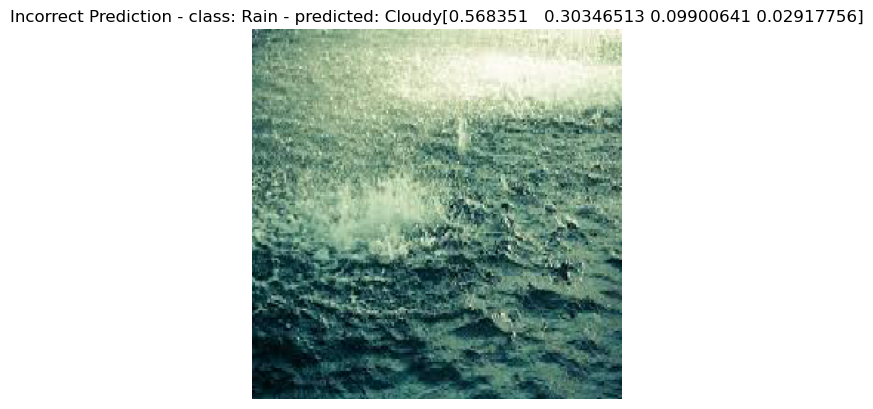

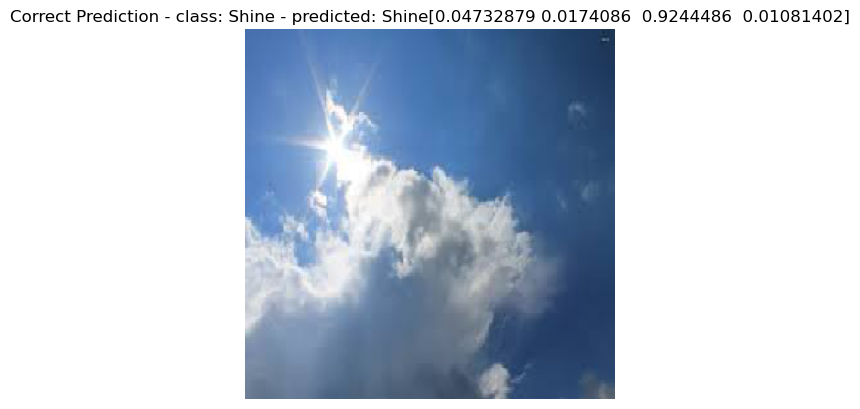

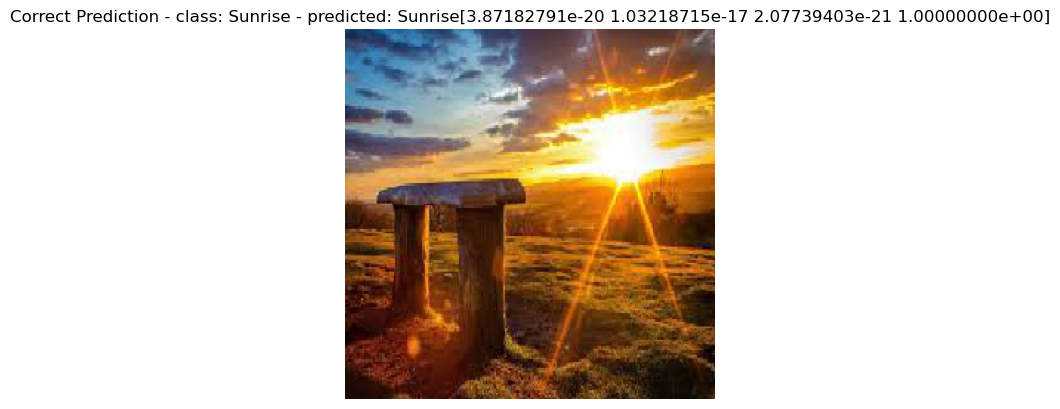

In [51]:
predict_one(model, 5) #<--you can show multiple pictures with this command. Just fill in the number you want to see.